# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №5
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы рассмотрите пройденные в курсе методы с точки зрения визуализации их "внутренностей". Девиз задания - все интерпретируемо! Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [6]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [7]:
table_data ["species"].value_counts()

Quercus_Coccifera         10
Acer_Opalus               10
Cornus_Macrophylla        10
Quercus_Crassifolia       10
Quercus_Castaneifolia     10
                          ..
Ilex_Cornuta              10
Quercus_Semecarpifolia    10
Cotinus_Coggygria         10
Ilex_Aquifolium           10
Quercus_Vulcanica         10
Name: species, Length: 99, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
random_seed = np.random.seed(21)

In [10]:
le = LabelEncoder ()
n_species = le.fit_transform (table_data ["species"])
table_data["species"] = n_species

In [11]:
X = np.array (table_data.loc [:, "margin1":])
X

array([[0.007812, 0.023438, 0.023438, ..., 0.004883, 0.      , 0.025391],
       [0.005859, 0.      , 0.03125 , ..., 0.000977, 0.039062, 0.022461],
       [0.005859, 0.009766, 0.019531, ..., 0.      , 0.020508, 0.00293 ],
       ...,
       [0.001953, 0.003906, 0.      , ..., 0.027344, 0.      , 0.001953],
       [0.      , 0.      , 0.046875, ..., 0.      , 0.001953, 0.00293 ],
       [0.023438, 0.019531, 0.03125 , ..., 0.023438, 0.025391, 0.022461]])

In [12]:
spl = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = random_seed)
for train_index, test_index in spl.split(X, table_data["species"]):
    train_idx = train_index
    test_idx = test_index
train_idx, test_idx

(array([257, 343, 494,  85, 851, 740, 173, 315,  63, 244, 647, 583, 241,
        548, 502, 717, 255, 669, 304, 831,  55,  60, 667, 924, 268, 746,
        803, 415, 841, 465, 719, 303, 962, 770, 702, 866,  22, 805, 604,
        621, 476, 695, 884, 468, 988, 949, 435, 540, 587, 887, 800, 890,
         70, 147, 602, 145,  67, 784, 528, 203, 638, 568, 400, 607, 665,
        910, 793, 389, 658, 183, 363, 501,  90, 721, 698, 462, 351, 620,
        700, 380,  40, 938, 297, 771, 679, 907, 668, 780,  30, 137, 298,
         52, 566, 584, 226, 299, 467, 894, 629, 809, 520, 269, 189, 385,
        752, 258, 661, 678, 943, 332, 821, 311, 799, 459, 437,  32, 561,
        906, 433, 785, 448, 176, 180, 545, 758, 524, 140, 172, 441, 570,
        153, 569, 138, 165, 846, 375, 927, 335,  61, 753, 551,  44, 837,
        822, 390,  74, 880,   9, 350, 617, 295, 171,  77, 599, 643, 819,
        885, 556, 827,  76, 559,  88, 971, 198,  84, 581, 703, 823, 565,
         19, 757, 463, 790, 216, 947, 450, 242, 961

In [13]:
y = table_data["species"]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [14]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


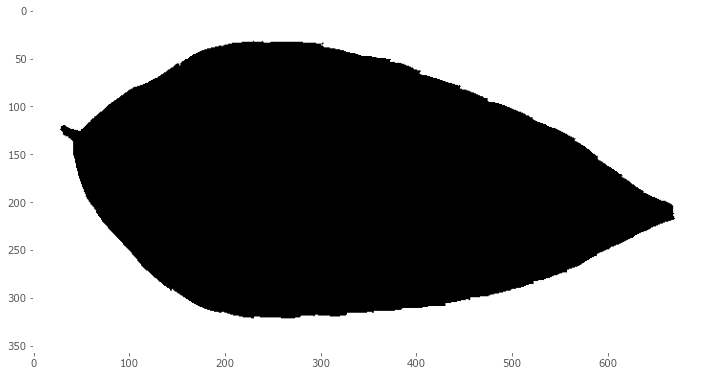

In [15]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [16]:
from skimage.transform import resize

In [17]:
img_resized = resize(img, (100, 100))

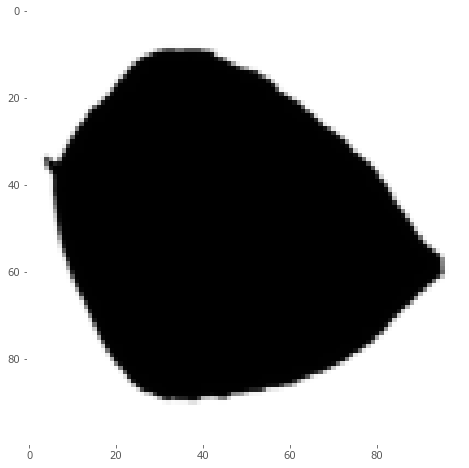

In [18]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов.  В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [19]:
images = np.ones (shape = (1584, 10000))
for i in range (1, 1585):
    filepath = os.path.join(IMG_DIR, str (i)+'.jpg')
    img = plt.imread(filepath)
    img_resized = np.ravel (resize(img, (100, 100)))
    images [i-1] = img_resized

In [20]:
images.shape

(1584, 10000)

In [21]:
id_leaf_train = table_data ['id'][train_idx]
id_leaf_test = table_data['id'][test_idx]

In [22]:
imgs_train = images [id_leaf_train - 1]
imgs_test = images [id_leaf_test - 1]

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

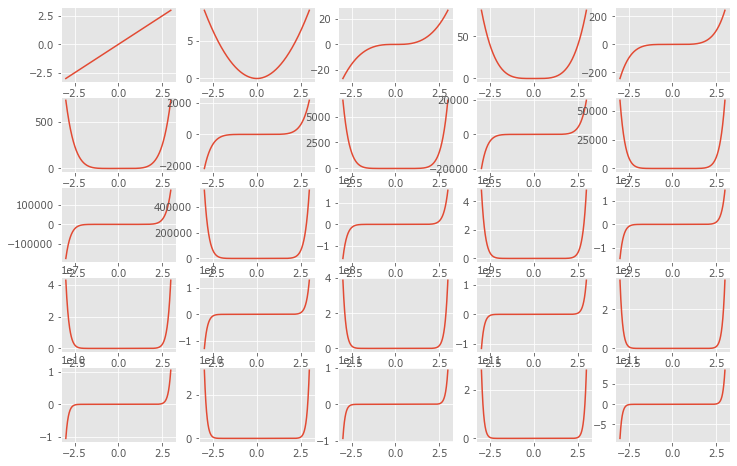

In [23]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

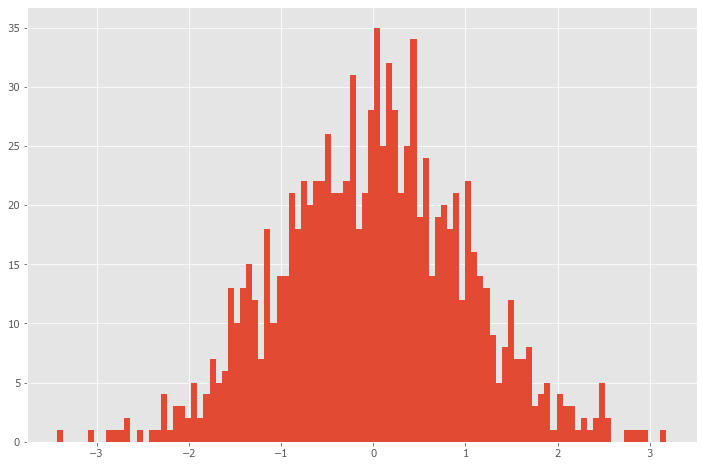

In [24]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (1 балл код +1 балл выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

In [25]:
spl_img = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1, random_state = random_seed)
for train_index, test_index in spl_img.split(X, table_data["species"]):
    test_idx_img = test_index
test_idx_img

array([900,  30, 839, 986,  28, 709,  58, 343, 617,  62, 421, 802, 791,
        33, 862, 889,  60, 755, 952, 829, 697, 598, 235, 474, 718, 356,
       435, 143, 160, 656, 348, 305, 265, 192, 546, 989, 574, 556, 596,
       808, 519, 210, 692, 347, 440, 728, 322, 367, 545, 416, 616, 277,
       244, 424, 968, 812, 694, 302, 214, 888, 807, 532, 309, 178, 781,
       108, 535, 472, 247, 527, 375, 935, 747, 970, 852, 483, 464, 350,
       882, 410, 443, 513, 750, 308, 492, 202, 964, 388, 137, 325, 974,
       777, 832, 908, 828, 810,  19, 831, 250], dtype=int64)

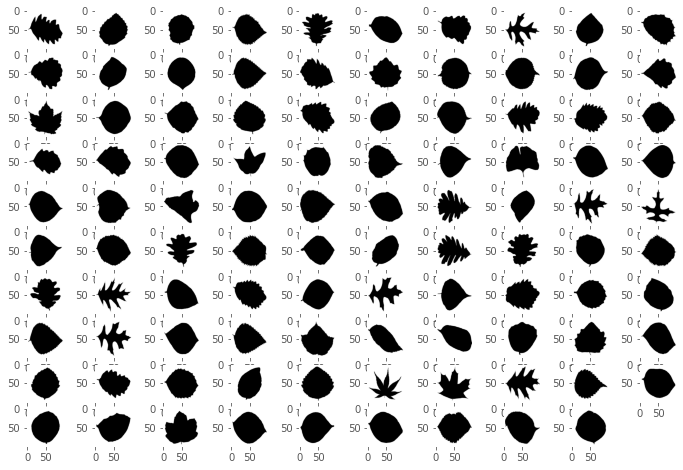

In [26]:
cnt = 0
for i in np.array (test_idx_img):
    cnt+= 1
    plt.subplot (10, 10, cnt)
    plt.imshow(np.reshape (images [i], (100, 100)), cmap='Greys')
    plt.grid(None)

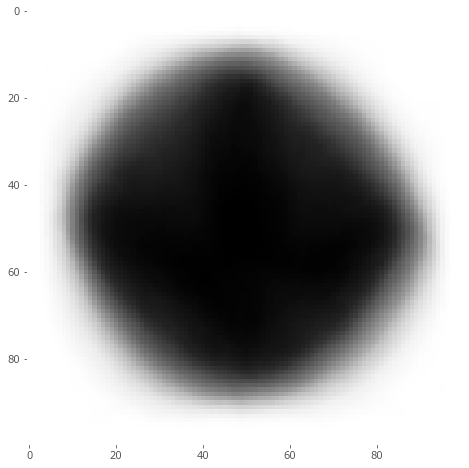

In [27]:
plt.imshow(np.reshape (np.mean (imgs_train, axis = 0), (100, 100)), cmap='Greys')
plt.grid(None)

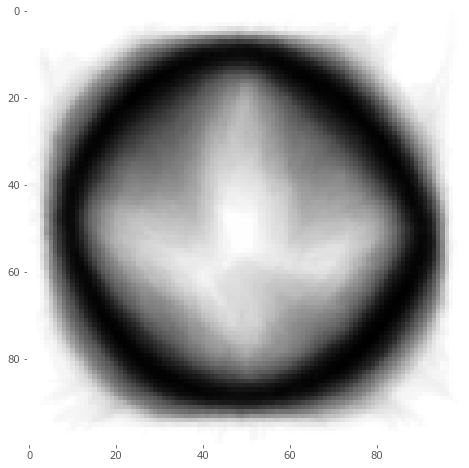

In [28]:
plt.imshow(np.reshape (np.std(imgs_train, axis = 0), (100, 100)), cmap='Greys')
plt.grid(None)


Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

1)Да, некоторые листья отличаются. Например, можно выделить листья кругообразнные с острым концом, сильно рассеченные, слабо рассеченные (наподобие дубовых).
3) Да, можно, можно бинаризовать по отсутствию/наличию пикселя.
4) Средний лист на обычный похож не очень, он имеет ромбообразную форму. Возможно, потому что не все листья округлые, некоторые имеют более геометричную форму, а также ориентированы в разную сторону, поэтому усредняются в ромб. Пиксели в центре картинки в основном константны

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [29]:
from sklearn.cluster import KMeans
km9 = KMeans (n_clusters=9, random_state = random_seed) 
km9.fit_predict(imgs_train)
km9_centr = km9.cluster_centers_

In [30]:
km25 = KMeans (n_clusters=25, random_state = random_seed) 
km25.fit_predict(imgs_train)
km25_centr = km25.cluster_centers_

In [31]:
km100 = KMeans (n_clusters=100, random_state = random_seed) 
km100.fit_predict(imgs_train)
km100_centr = km100.cluster_centers_

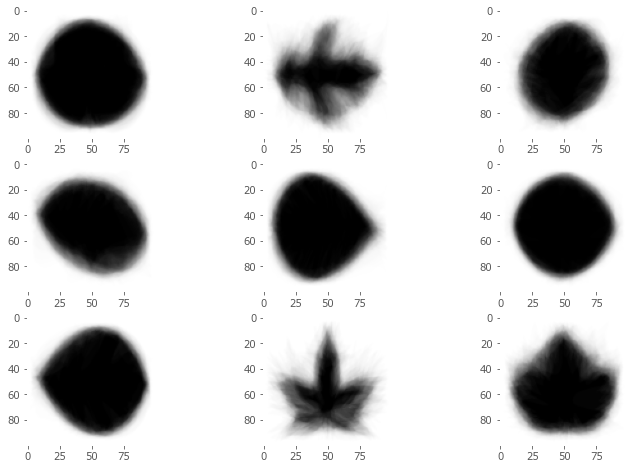

In [32]:
for i in range(1, 10): 
    plt.subplot(3, 3, i) 
    plt.imshow(np.reshape (km9_centr [i-1], (100, 100)), cmap='Greys')
    plt.grid(None)                     

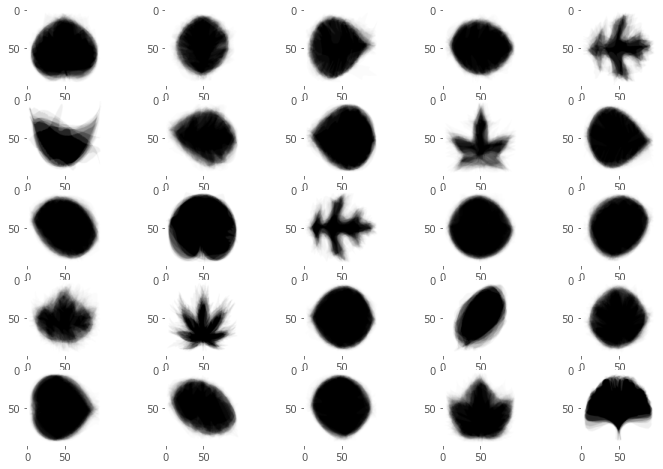

In [33]:
for i in range(1, 26): 
    plt.subplot(5, 5, i) 
    plt.imshow(np.reshape (km25_centr [i-1], (100, 100)), cmap='Greys')
    plt.grid(None)   

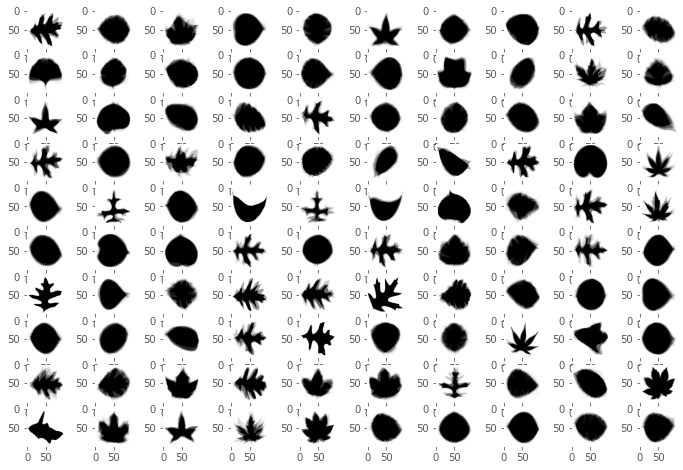

In [34]:
for i in range(1, 101): 
    plt.subplot(10, 10, i)  
    plt.imshow(np.reshape (km100_centr [i-1], (100, 100)), cmap='Greys')
    plt.grid(None)   

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

1) да, центры кластеров визуально похожи на листья
2) картинки имеют как бы "шумовые", "теневые" пиксели, это объясняется их отличием от центрального объекта
3) да, есть (например, кленовые и дубовые деревья встречаются несколько раз)
4) 25 кластеров. Меньше повторяющихся значений, чем в 100 кластерах, но при этом можно четче выделить форму листа (а не как в 9 кластерах не очень похожие листья круги).

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)
Настройте 3 классификатора на изображениях и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется атрибут feature\_log\_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [35]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(imgs_train, table_data["species"][train_idx])

NearestCentroid()

In [36]:
from sklearn.metrics import accuracy_score
preds_nc = nc.predict(imgs_test)
accuracy_score(table_data["species"][test_idx], preds_nc)

0.5707070707070707

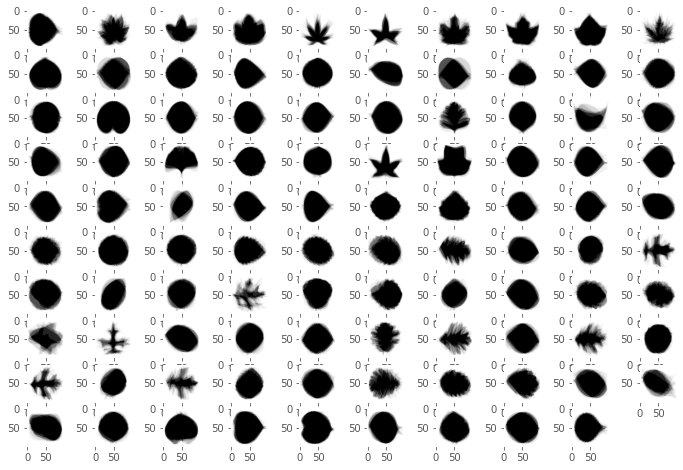

In [37]:
for i in range(1, 100): # числа от 1 до 25
    plt.subplot(10, 10, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
    plt.imshow(np.reshape (nc.centroids_ [i-1], (100, 100)), cmap='Greys')
    plt.grid(None)   

In [38]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(imgs_train, table_data["species"][train_idx])
preds_mnb = mnb.predict(imgs_test)
accuracy_score(table_data["species"][test_idx], preds_mnb)

0.5353535353535354

In [39]:
mnb.feature_log_prob_.shape

(99, 10000)

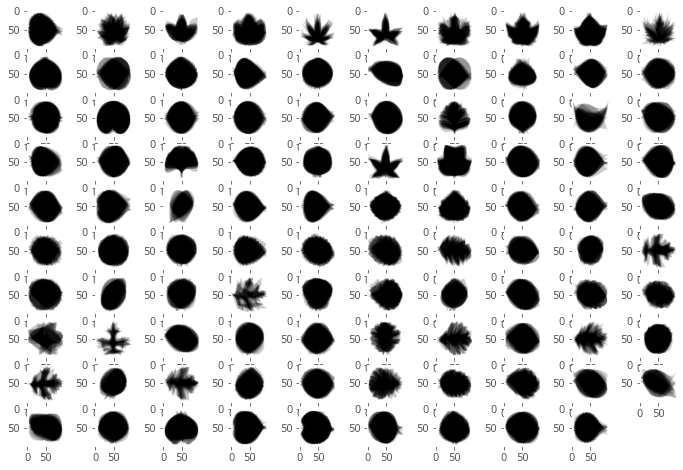

In [40]:
for i in range(1, 100): # числа от 1 до 25
    plt.subplot(10, 10, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
    plt.imshow(np.reshape (mnb.feature_log_prob_ [i-1], (100, 100)), cmap='Greys')
    plt.grid(None)   

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000, random_state = random_seed)
lr.fit(imgs_train, table_data["species"][train_idx])
preds_lr = lr.predict(imgs_test)
accuracy_score(table_data["species"][test_idx], preds_lr)

0.6515151515151515

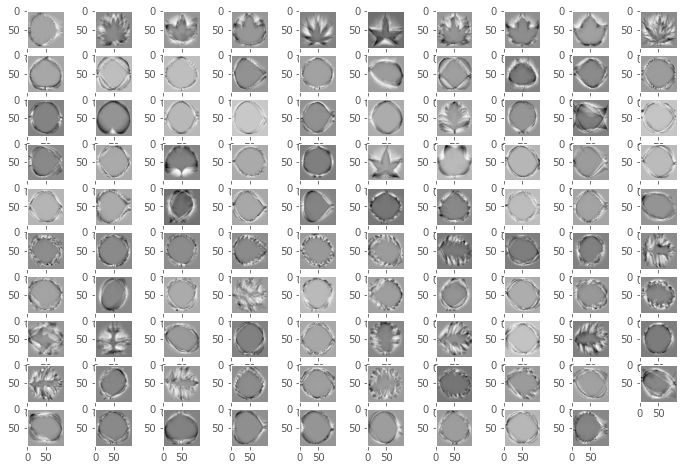

In [44]:
for i in range(1, 100): # числа от 1 до 25
    plt.subplot(10, 10, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
    plt.imshow(np.reshape (lr.coef_ [i-1], (100, 100)), cmap='Greys')
    plt.grid(None)  

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

1) Лучше всего работает логистическая регрессия. Возможно, потому, что механизм логистической регрессии как бы максимизирует средние значения
2) Да, все изображения похожи на листья
3) Возможно, потому, что белым пикселям тоже присваиваются какие-то веса

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на изображениях. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = random_seed)
rf.fit(imgs_train, table_data["species"][train_idx])
preds_rf = rf.predict(imgs_test)
accuracy_score(table_data["species"][test_idx], preds_rf)

0.5555555555555556

In [47]:
rf.feature_importances_.shape

(10000,)

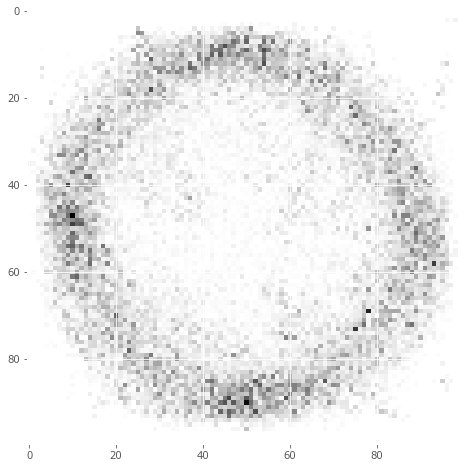

In [48]:
plt.imshow(np.reshape (rf.feature_importances_, (100, 100)), cmap='Greys')

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

1) нет, не похожа, скорее, это усредненный круг без середины
2) Скорее, не соответсвует, потому что не учитывается фигурность листьев. В целом, если учесть, что центр листа попадает в константные признаки, то его участки дейтсвительно не помогут определить класс

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [50]:
num_components = 2**np.arange(10)
num_components.shape

(10,)

In [57]:
from sklearn.decomposition import PCA
ac_train = np.ones (shape = (10,))
ac_test = np.ones (shape = (10,))
rf1 = RandomForestClassifier(random_state = random_seed)
cnt1 = 0
for i in num_components:
    pc = PCA (n_components = i, random_state=random_seed)
    x = pc.fit_transform (imgs_train)
    x1 = pc.fit_transform (imgs_test)
    rf1.fit(x, table_data["species"][train_idx])
    preds_tr = rf1.predict(x)
    preds_te = rf1.predict(x1)
    ac_test[cnt1] = accuracy_score(table_data["species"][test_idx], preds_te)
    ac_train[cnt1] = accuracy_score(table_data["species"][train_idx], preds_tr)
    cnt1 +=1

ValueError: n_components=256 must be between 0 and min(n_samples, n_features)=198 with svd_solver='full'

In [55]:
ac_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [60]:
rf_tab = RandomForestClassifier(random_state = random_seed)
rf_tab.fit (X_train, y_train)
preds_tab_tr = rf_tab.predict (X_train)
preds_tab_te = rf_tab.predict (X_test)
ac_tab_te = accuracy_score(y_test, preds_tab_te)
ac_tab_te

0.9797979797979798

Да, качетсво сильно изменилось в лучшую сторону. Возможно, потому, что табличные признаки лучше описывают изображение, чем пиксельные (которые мы всячески масштабировали в процессе).

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса для модели на табличных данных.

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [63]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold (n_splits = 4, random_state = random_seed)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 69  70  87  96 101 106 110 113 116 117 130 137 139 142 144 146 147 149
 154 159 163 173 181 182 185 186 187 188 193 195 197 199 200 204 207 212
 213 214 216 218 219 223 225 226 227 228 230 232 234 235 236 237 238 239
 241 243 244 245 246 248 249 250 252 253 255 256 257 258 263 266 267 269
 272 274 275 276 277 278 279 280 281 283 284 285 286 287 288 289 290 292
 294 295 297 298 300 302 303 305 306 309 311 312 315 316 317 319 321 322
 324 325 327 330 331 332 335 336 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 357 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 377 378 379 380 381 383 384 385 386 387 389
 390 391 392 393 394 395 396 397 399 400 401 403 406 408 409 410 411 413
 414 418 419 420 421 423 425 427 428 429 430 431 432 433 434 436 437 438
 439 440 441 442 443 444 445 446 447 448 449 450 451 453 454 455 456 457
 458 459 460 461 463 464 465 466 467 468 469 471 472 473 474 475 476 477
 478 479 480 481 482 483 484 485 486 487 488